## Wine Quality Prediction
                                    By: Vishal Kadu

In [4]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
dataset = pd.read_csv('1_Data.csv')

print("Data Loaded Succesfully")
 
dataset.head() #Return the first 5 rows of the dataframe

Data Loaded Succesfully


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [7]:
#let's see summary of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [8]:
#check for null values in given data and sum of values
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### hence we got to know that there is no missing value, that's great!

<AxesSubplot:xlabel='quality', ylabel='count'>

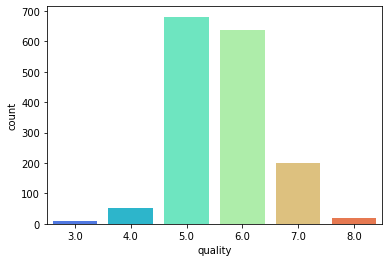

In [9]:
#visulizing Quality using Countplot
sns.countplot(x=dataset['quality'],palette='rainbow')

#### here it shows that mostly wines quality is average with less than 60 wines are of high quality.
#### let's find relation among different entities with quality,we will use corr() correlation to find out.


In [10]:
dataset.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

so we got to know that,

alcohol (0.476166)has more correlated with resepect to other entities.

volatile acidity is showing higher negative correlation.

residual sugar is least correlated as it's nearly eqaual to 0.

<AxesSubplot:>

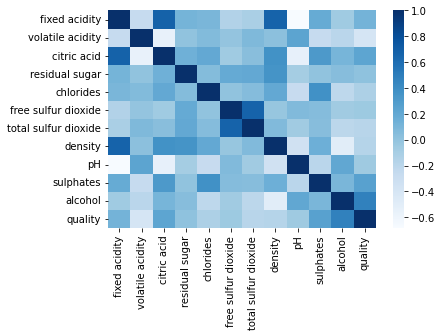

In [11]:
#let's plot a heatmap to show relationships between variables.
sns.heatmap(dataset.corr(),cmap='Blues')

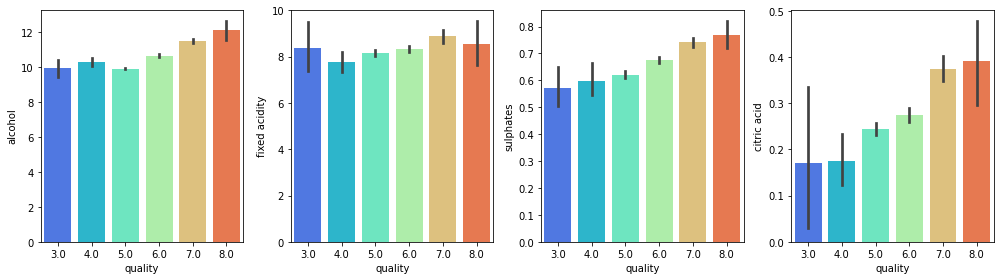

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(1,4,1)
sns.barplot(x = 'quality', y = 'alcohol', data = dataset,palette='rainbow')
plt.subplot(1,4,2)
sns.barplot(x = 'quality', y = 'fixed acidity', data = dataset,palette='rainbow')
plt.tight_layout()
plt.subplot(1,4,3)
sns.barplot(x = 'quality', y = 'sulphates', data = dataset,palette='rainbow')
plt.tight_layout()
plt.subplot(1,4,4)
sns.barplot(x = 'quality', y = 'citric acid', data = dataset,palette='rainbow')
plt.tight_layout()

Hence it's clear that,

a. Amount of alcohol increases Quality increases

b. Fixed acidity don't have clear insight.

c. Sulphatees and Citric acid showing positive increase with respect to Quality.

Transforming Dependant Variable
catagorise it into 1 and 0 Good(>6.5) and Bad(<6.5) 

In [13]:
dataset['quality']=[1 if i >6.5 else 0 for i in dataset['quality']]
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

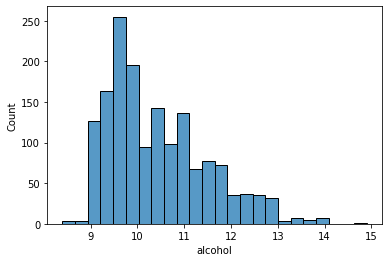

In [14]:
sns.histplot(dataset['alcohol'])

#### Determining Outliers 

<AxesSubplot:xlabel='chlorides'>

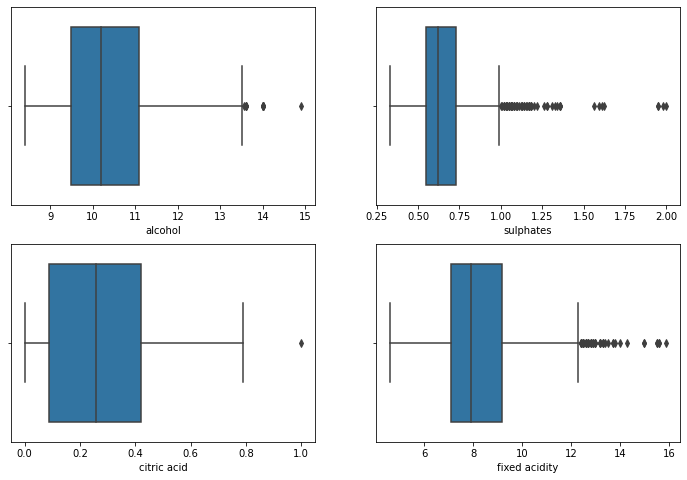

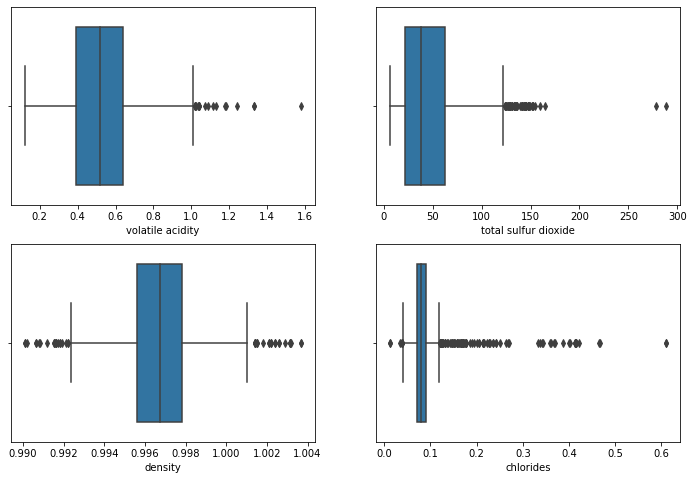

In [15]:
#using boxplot for given catagorical variables
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x=dataset['alcohol'])
plt.subplot(2,2,2)
sns.boxplot(x=dataset['sulphates'])
plt.subplot(2,2,3)
sns.boxplot(x=dataset['citric acid'])
plt.subplot(2,2,4)
sns.boxplot(x=dataset['fixed acidity'])
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x=dataset['volatile acidity'])
plt.subplot(2,2,2)
sns.boxplot(x=dataset['total sulfur dioxide'])
plt.subplot(2,2,3)
sns.boxplot(x=dataset['density'])
plt.subplot(2,2,4)
sns.boxplot(x=dataset['chlorides'])

we observed that total sulphur dioxide have values so far

To find out outliers we will use Z Score(standard score) Method

Z = (observed value - mean of the sample)/standard deviation of the sample

In [16]:
dataset['zscore']=((dataset['citric acid']-dataset['citric acid'].mean())/dataset['citric acid'].std())
filt=np.abs(dataset['zscore'])<3
dataset=dataset[filt]

In [17]:
dataset['zscore2']=((dataset['alcohol']-dataset['alcohol'].mean())/dataset['alcohol'].std())
filt=np.abs(dataset['zscore2'])<3
dataset=dataset[filt]

In [18]:
dataset['zscore3']=((dataset['total sulfur dioxide']-dataset['total sulfur dioxide'].mean())/dataset['total sulfur dioxide'].std())
filt=np.abs(dataset['zscore3'])<3
dataset=dataset[filt]

### Model Development

In [19]:
# X is independant variable and  y is Dependant or Target variable
X=dataset.drop(['quality','zscore','zscore2','zscore3'],axis=1,inplace = False)
y=dataset['quality']

In [20]:
#Data Spliting 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20,random_state=42)

In [21]:
# data Scaling using Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
x_train=scaling.fit_transform(X_train)
x_test=scaling.fit_transform(X_test)

In [22]:
# Now we will be using Different ML Algorithms to find out which is giving us best Accuracy.

In [23]:
# 1. Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression

In [24]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test) #measuring the accuracy of the model against the training data (R^2 method)

0.8761904761904762

In [25]:
# 2. Decision Tree Classifier algorithm
from sklearn import tree

In [26]:
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8793650793650793

In [29]:
# 3. k-nearest neighbors (KNN) algorithm
from sklearn.neighbors import KNeighborsClassifier

In [30]:
for i in range(1,60):
    model=KNeighborsClassifier( n_neighbors=i,metric='manhattan')
    model.fit(x_train,y_train)
    print(i+model.score(x_test,y_test))

1.8857142857142857
2.8793650793650793
3.8857142857142857
4.882539682539683
5.895238095238096
6.87936507936508
7.895238095238096
8.885714285714286
9.885714285714286
10.885714285714286
11.88888888888889
12.87936507936508
13.876190476190477
14.882539682539683
15.882539682539683
16.885714285714286
17.88888888888889
18.882539682539683
19.882539682539683
20.882539682539683
21.87936507936508
22.87936507936508
23.87936507936508
24.882539682539683
25.876190476190477
26.882539682539683
27.882539682539683
28.876190476190477
29.876190476190477
30.876190476190477
31.876190476190477
32.87301587301587
33.86984126984127
34.87301587301587
35.87301587301587
36.87301587301587
37.87619047619047
38.88253968253968
39.87936507936508
40.88253968253968
41.88253968253968
42.87936507936508
43.87936507936508
44.87936507936508
45.88253968253968
46.87936507936508
47.88253968253968
48.885714285714286
49.885714285714286
50.885714285714286
51.888888888888886
52.888888888888886
53.888888888888886
54.89206349206349
55.8

hence value 8 is optimal k.

In [31]:
# k=8
model=KNeighborsClassifier( n_neighbors=8,metric='manhattan')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8857142857142857

In [35]:
# 4. Support Vector Machine algorithm
from sklearn.svm import SVC

In [36]:
model=SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8952380952380953

Finally we get Accuracy near to 90%

#### Create Test case to predict 

In [32]:
''' 
#Accepting values 
a=float(input("Enter value of 'fixed acidity': "))
b=float(input("Enter value of 'volatile acidity': "))
c=float(input("Enter value of 'citric acid': "))
d=float(input("Enter value of 'chlorides': "))
e=float(input("Enter value of 'total sulfur dioxide': "))
f=float(input("Enter value of 'density': "))
g=float(input("Enter value of 'pH': "))
h=float(input("Enter value of 'sulphates': "))
i=float(input("Enter value of 'alcohol': "))
'''

' \n#Accepting values \na=float(input("Enter value of \'fixed acidity\': "))\nb=float(input("Enter value of \'volatile acidity\': "))\nc=float(input("Enter value of \'citric acid\': "))\nd=float(input("Enter value of \'chlorides\': "))\ne=float(input("Enter value of \'total sulfur dioxide\': "))\nf=float(input("Enter value of \'density\': "))\ng=float(input("Enter value of \'pH\': "))\nh=float(input("Enter value of \'sulphates\': "))\ni=float(input("Enter value of \'alcohol\': "))\n'

In [33]:

#Using k-nearest neighbors (KNN) algorithm with k=8

model=KNeighborsClassifier( n_neighbors=8,metric='manhattan')

model.fit(x_train,y_train)

#test_list = [a,b,c,d,e,f,g,h,i]
test_list = [6.2,0.560,0.09,1.92,0.053,10,32,0.99402,3.54,0.60,11.3]

test_df = pd.DataFrame(test_list)               

test = test_df.transpose()                            

test_pred = model.predict(test)           

if(test_pred == 0):                            

    print("Wine Quality Is Good.")

else:

    print("Wine Quality Is Not Good.")

Wine Quality Is Good.


In [34]:
# file model.py
import pandas as pd
import numpy as np
import pickle

dataset = pd.read_csv('1_Data.csv')


dataset['quality']=[1 if i >6.5 else 0 for i in dataset['quality']]
dataset['quality'].value_counts( )

dataset['zscore']=((dataset['citric acid']-dataset['citric acid'].mean())/dataset['citric acid'].std())
filt=np.abs(dataset['zscore'])<3
dataset=dataset[filt]

dataset['zscore2']=((dataset['alcohol']-dataset['alcohol'].mean())/dataset['alcohol'].std())
filt=np.abs(dataset['zscore2'])<3
dataset=dataset[filt]

dataset['zscore3']=((dataset['total sulfur dioxide']-dataset['total sulfur dioxide'].mean())/dataset['total sulfur dioxide'].std())
filt=np.abs(dataset['zscore3'])<3
dataset=dataset[filt]

X=dataset.drop(['quality','zscore','zscore2','zscore3'],axis=1,inplace = False)
y=dataset['quality']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20,random_state=42)

# data Scaling using Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
x_train=scaling.fit_transform(X_train)
x_test=scaling.fit_transform(X_test)

#  Support Vector Machine algorithm
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

# Saving model to disk
pickle.dump(svc, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

### Thanks.